<a href="https://colab.research.google.com/github/aditimahabole/ML_NLP_Depression_Prediction_Tweets/blob/main/ml_nlp_pbl_sem7_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install nltk

In [13]:
pip install pandas

In [14]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

In [15]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
data = pd.read_csv("/content/train.csv")
print(data.sample(3))

                 PID                                          Text_data  \
5224  train_pid_5225  I opened up about my Problems and got insulted...   
3453  train_pid_3454  Fuck you 2019, what a shitty year : I’ve reall...   
547    train_pid_548  Was having a shit day before I even realized i...   

         Label  
5224  moderate  
3453  moderate  
547   moderate  


In [17]:
X = data['Text_data']
y = data['Label']

In [18]:
print(X[0:5])

0    Waiting for my mind to have a breakdown once t...
1    My new years resolution : I'm gonna get my ass...
2    New year : Somone else Feeling like 2020 will ...
3    My story I guess : Hi, Im from Germany and my ...
4    Sat in the dark and cried myself going into th...
Name: Text_data, dtype: object


In [19]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

Function for cleaning data

In [20]:
def clean_data(X):
  corpus = []
  lemmatizer = WordNetLemmatizer()
  for i in range(0,len(X)):
    sentence = re.sub('[^a-zA-Z]',' ',X[i])
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [re.sub('[^a-zA-Z]',' ',word) for word in sentence]
    sentence = [lemmatizer.lemmatize(word) for word in sentence if word not in stopwords.words('english')]
    sentence = ' '.join(sentence)
    corpus.append(sentence)
  return corpus

Naive Bayes Classifier

In [21]:
class Naive_Bayes_Classifier:
  # Constructor
  def __init__(self):
    self.class_prob = {} # P(class)
    self.word_prob = {}  # P(word | class)
    self.total_classes = len(y)
    self.vocabulary = set()



  # Fit data function
  def fit_data(self,X,y):
    count_of_class = {}
    class_samples = len(y)
    for label in y:
      if label in count_of_class:
        count_of_class[label] += 1 #for duplicates
      else:
        count_of_class[label] = 1 # whenever new word comes
    print("-------------Total Classes--------------")
    print(self.total_classes,end="\n")
    print("----------COUNT OF CLASS-----------")
    result = list(count_of_class.items())[:5]
    print(result)

    # Calculating probabilities of each class
    for label , count in count_of_class.items():
      print("label  = "+str(label)+" |  count = "+str(count),end="\n")
      self.class_prob[label] = count/self.total_classes
    print("---------CLASS PROBABILITY-----------")
    print(self.class_prob,end="\n")

    # Distinct classes
    distinct_classes = set(y)
    print("----Distinct Classes----")
    print(distinct_classes,end="\n")
    # Vocabulary
    for sen in X:
      for word in sen.split():
        self.vocabulary.add(word)
    print(f"----Vocabulary----\n")
    print(self.vocabulary)
    print(f"----Vocabulary Length----\n")
    print(len(self.vocabulary))
    # Calculating probabilities of words w.r.t each class
    for topic in distinct_classes:
      self.word_prob[topic] = {}
      # Storing the words that belong to topic
      class_words = []
      for text , label in zip(X,y):
        if label == topic:
          for word in text.split():
            class_words.append(word)
      print("========Class Words=========")
      print(class_words[0:10])
      total_words = len(class_words)
      # Counting the word frequencies
      word_counts = {}
      #{ word:count}
      for word in class_words:
          if word in word_counts:
              word_counts[word] += 1
          else:
              word_counts[word] = 1

      vocabulary_len = len(self.vocabulary)
      # formula = (C(word| class) + 1 ) / (C(class) + |V|)
      # Applying Naive Bayes formula
      for w in word_counts:
        word_freq = word_counts[w]
        numerator = word_freq + 1
        denominator = total_words + vocabulary_len
        formula = numerator / denominator
        self.word_prob[topic][w] = formula
    print("---ALL WORD PROPB-----")
    for label, details in self.word_prob.items():
      print(f"<<<<<<<<{label}>>>>>>>:",end="\n")
      # Iterate over the inner dictionary
      counter = 0
      for word, probability in details.items():
        if counter <=8 :
          print(f"  {word}   :   {probability}  ")
          counter+=1
        else: break



  def predict(self, X):
    predictions = []
    print("inside predict")
    for sentence in X:
      print("S : ")
      print(sentence,end="\n")
      max_prob = -1
      predicted_class = None
      distinct_classes = set(y)
      for label in distinct_classes :
        post_prob = self.class_prob[label]
        for word in sentence.split():
          if word in self.word_prob[label]:
            post_prob*= self.word_prob[label][word]
        if post_prob>max_prob:
          max_prob = post_prob
          predicted_class = label
      predictions.append([predicted_class,sentence])
    return predictions


Cleaning input data

In [22]:
X = clean_data(X)
print(X[345])

two label two box month ago warehouse two label switched put wrong box chain reaction since sobbing inconsolably hating life happy new year


Showing some cleaned data


In [23]:
print("-----------------------------------------------")
for i in range(2,7):
  print(X[i],end = "\n")
print("-----------------------------------------------")

-----------------------------------------------
new year somone else feeling like last year earth even wen hammerd feeling like moron thats depressed
story guess hi im germany english mostly self learned please excuse anything wrong go depressed year one real life talk thought post story start year old best friend talking shit telling fake friend without anything reason still best friend changed luckily original cause depression never told anyone family tho thing started get normal suffered serious trust issue also made socially awkward since cant talk new people without swetting stressed general find new friend person already friend one friend yeah experience fucked head always scared people leaving slightest sign someone acting normal freak get even depressed social ability even brave enough ask wich also problem never told anyone scared would care also best friend told talk everything care basically doesnt sound bad still ruined self esteem nobody except one friend know also depress

Initializing Naive Bayes classifier

In [24]:
NB_classifier = Naive_Bayes_Classifier()

Fiting training data

In [25]:
# Train the classifier using the fit_data method
NB_classifier.fit_data(X, y)

-------------Total Classes--------------
8891
----------COUNT OF CLASS-----------
[('moderate', 6004), ('not depression', 1985), ('severe', 902)]
label  = moderate |  count = 6004
label  = not depression |  count = 1985
label  = severe |  count = 902
---------CLASS PROBABILITY-----------
{'moderate': 0.675289618715555, 'not depression': 0.2232594758744798, 'severe': 0.10145090540996514}
----Distinct Classes----
{'moderate', 'not depression', 'severe'}
----Vocabulary----

{'mysekf', 'pharmacymedications', 'diet', 'newborn', 'tampering', 'gesture', 'thank', 'anorexic', 'rejoined', 'kissing', 'taunt', 'landmark', 'duo', 'forever', 'college', 'extracurricular', 'highway', 'led', 'admission', 'render', 'ground', 'ly', 'gap', 'trait', 'xl', 'flowing', 'stomach', 'sell', 'vibing', 'raising', 'gallon', 'meaningful', 'expo', 'busying', 'assaulted', 'safely', 'flourish', 'compassionate', 'aderrall', 'tether', 'everyhting', 'impeccable', 'klonopin', 'depressed', 'stiff', 'press', 'reject', 'fufil

Loading Test Data

In [26]:
test_dataset = pd.read_csv("/content/test.csv")
X_test = test_dataset['text data']
# X_test = ["I've been depressed for 4 years now and I'm only 16 and because I have no one in real life to talk to, I thought I'll just post it here. "]
print(X_test[0:5])

0    Im scared : This is it. I lie to myself every ...
1    New to this but just wanted to vent : I just f...
2    I’m sad : It’s kinda always been an issue. I w...
3    Lonely but not alone. : All of my immediately ...
4    This year has been trash. : I dont know why I’...
Name: text data, dtype: object


Cleaning Test data first

In [27]:
X_test = clean_data(X_test)

Showing some cleaned Test data

In [28]:
for i in range(0,6):
  print(X_test[i],end="\n")

im scared lie every day say ill make think might thought wanted girlfriend realize really want feel loved ive spent year earth ive felt completely alone forever heart hurt subconscious taunt every night wake reality im loser worth anyones time im scared live like day die im torn inside im much coward end im sorry
new wanted vent finally realized kind bad mental state feeling dread want work made excuse go work kind feel like stem financially unstable living pay check pay check hating job toxic environment enough feeling like walk eggshell around people people talk standard school trying keep grade know thought console want anything kind sad know explain hope someone relate
sad kinda always issue say bad peer definitely bad lot obviously write cause would take say grand scheme thing basically really happy happy definitely started get really bad last year always issue growing emotional growing time th th grade self esteem issue much reason like tbh hated almost everything like middle th 

Prediction classes of test data

In [29]:
prediction = NB_classifier.predict(X_test[0:6])
# print(prediction)
print("Output                              Sentence",end="\n")
for i in prediction:
  print(str(i[0])+"           "+str(i[1]),end = "\n")

inside predict
S : 
im scared lie every day say ill make think might thought wanted girlfriend realize really want feel loved ive spent year earth ive felt completely alone forever heart hurt subconscious taunt every night wake reality im loser worth anyones time im scared live like day die im torn inside im much coward end im sorry
S : 
new wanted vent finally realized kind bad mental state feeling dread want work made excuse go work kind feel like stem financially unstable living pay check pay check hating job toxic environment enough feeling like walk eggshell around people people talk standard school trying keep grade know thought console want anything kind sad know explain hope someone relate
S : 
sad kinda always issue say bad peer definitely bad lot obviously write cause would take say grand scheme thing basically really happy happy definitely started get really bad last year always issue growing emotional growing time th th grade self esteem issue much reason like tbh hated alm

Data Visualization

In [ ]:
counter = {}
for i in range(0,len(prediction)-1):
   if prediction[i][0] in counter:
    counter[prediction[i][0]] += 1
   else:
    counter[prediction[i][0]] = 1



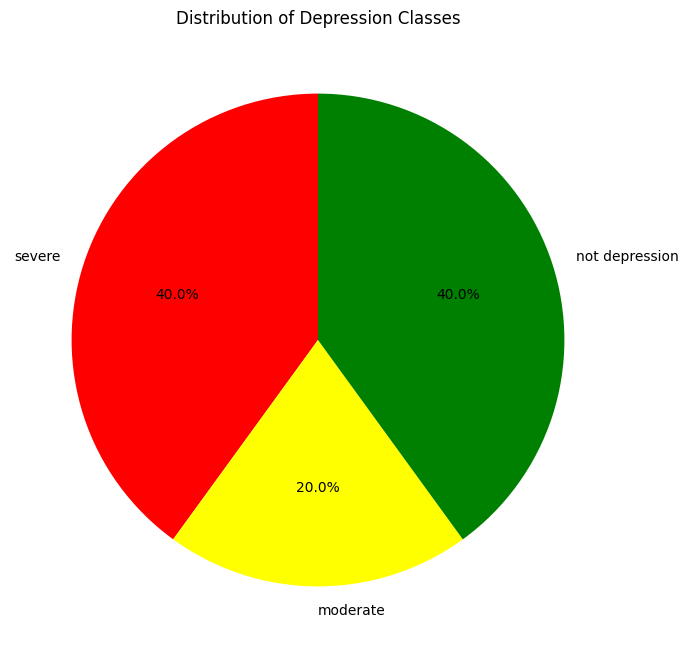

In [ ]:
import matplotlib.pyplot as plt
class_labels = list(counter.keys())
class_counts = list(counter.values())
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=['red', 'yellow', 'green'])
plt.title('Distribution of Depression Classes')
plt.show()



Random Test case


In [ ]:
X_test = ["My friend cries a lot daily , she cant stop crying she says I do not want  to live , and should die as its not point living , she did a lot for his boyfriend but in return she did not get love so she is very much sad "]
X_test = clean_data(X_test)
prediction = NB_classifier.predict(X_test)
print(prediction)